# Analysis on Netflix Movies & TV Shows

Netflix is the world's top streaming service which offers wide variety of award-winning tv shows, movies and much more. In this analysis, we will explore netflix dataset through visualizations and graphs using python libraries

## Installing of Packages 

In this step, we will install python packages that are useful for our analysis.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib

## Loading the Dataset
We are ready to load the dataset. We will do this using the read_csv command from Pandas for reading the .csv file and Let's take a glimpse at how the data looks like.

In [2]:
netflix_titles = pd.read_csv('netflix_titles.csv')
netflix_titles.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


From the dataset, we can tell that there are some titles without rating and name of the director. There are some NaN values in the dataset

# Data Preparation and Cleaning

In [3]:
netflix_titles.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [4]:
netflix_titles.nunique()

show_id         8807
type               2
title           8807
director        4528
cast            7692
country          748
date_added      1767
release_year      74
rating            17
duration         220
listed_in        514
description     8775
dtype: int64

There are **8807 rows** and **12 columns** to work with for EDA. Here, there are a few columns that contain null values ('director', 'cast', 'country', 'date_added', 'rating').

## Handling Null Values
We can see that for each of the columns, there are alot different unique values for some of them. It makes sense that show_id is large since it is a unique key used to identify a movie/show. Title, director, cast, country, date_added, listed_in, and description contain many unique values as well.

Now using isnull(), we can find the null values in the dataset

In [5]:
netflix_titles.isnull().sum().sum()

4307

In [6]:
netflix_titles.isnull().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

Above in the table, we can see that there are quite a few null values in the dataset. There are a total of **4,307 null values** across the entire dataset with 2634 missing points under 'director', 825 under 'cast', 831 under 'country', 10 under 'date_added', and 4 under 'rating'. We will have to handle all null data points before we can dive into EDA (Exploratory Data Analysis) and modeling.

**HeatMap to identify where there are null values in the dataset**

Text(0.5, 1.0, 'Null values in dataset')

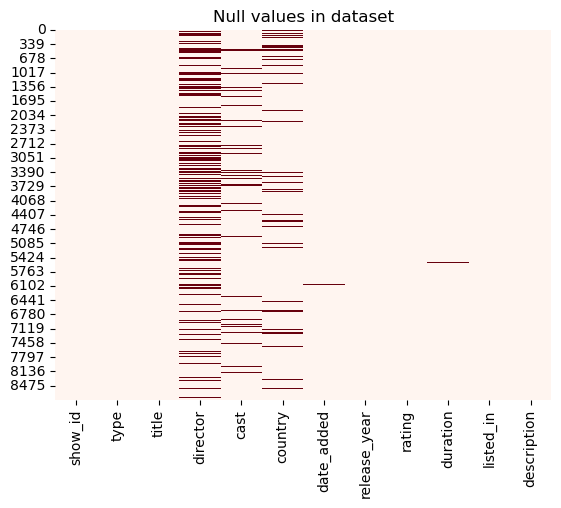

In [7]:
sns.heatmap(netflix_titles.isnull(),cbar=False,cmap='Reds')
plt.title('Null values in dataset')

As you can in the above heatmap, most of the null values are in the column of director  followed by cast and country.

In [8]:
netflix_titles['director'].fillna('No Director',inplace =True)
netflix_titles['cast'].fillna('No Cast', inplace=True)
netflix_titles['country'].fillna('Country Unavailable', inplace=True)
netflix_titles.dropna(subset=['date_added','rating','duration'],inplace=True)

For null values, the easiest way to get rid of them would be to delete the rows with the missing data. However, this wouldn't be beneficial to our EDA since there is loss of information. Since 'director', 'cast', and 'country' contain the majority of null values, I will choose to treat each missing value as unavailable. The other three labels 'date_added' ,  'duration' and 'rating' contains an insignificant portion of the data so I will drop them from the dataset. 

In [9]:
netflix_titles.isnull().any()

show_id         False
type            False
title           False
director        False
cast            False
country         False
date_added      False
release_year    False
rating          False
duration        False
listed_in       False
description     False
dtype: bool

After, we can see that there are no more null values in the dataset.

## Splitting the Dataset
Since the dataset can either contain movies or shows, it'd be nice to have datasets for both so we can do a good analysis into for Netflix movies or Netflix TV shows or analysing both. So we will create two new datasets. One for movies and the other one for shows.

In [10]:
netflix_movies = netflix_titles[netflix_titles.type == 'Movie'].copy()

In [11]:
netflix_movies.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,No Cast,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
6,s7,Movie,My Little Pony: A New Generation,"Robert Cullen, José Luis Ucha","Vanessa Hudgens, Kimiko Glenn, James Marsden, ...",Country Unavailable,"September 24, 2021",2021,PG,91 min,Children & Family Movies,Equestria's divided. But a bright-eyed hero be...
7,s8,Movie,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...","United States, Ghana, Burkina Faso, United Kin...","September 24, 2021",1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies","On a photo shoot in Ghana, an American model s..."
9,s10,Movie,The Starling,Theodore Melfi,"Melissa McCarthy, Chris O'Dowd, Kevin Kline, T...",United States,"September 24, 2021",2021,PG-13,104 min,"Comedies, Dramas",A woman adjusting to life after a loss contend...
12,s13,Movie,Je Suis Karl,Christian Schwochow,"Luna Wedler, Jannis Niewöhner, Milan Peschel, ...","Germany, Czech Republic","September 23, 2021",2021,TV-MA,127 min,"Dramas, International Movies",After most of her family is murdered in a terr...


In [12]:
netflix_shows = netflix_titles[netflix_titles.type == 'TV Show'].copy()

In [13]:
netflix_shows.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
1,s2,TV Show,Blood & Water,No Director,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",Country Unavailable,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,No Director,No Cast,Country Unavailable,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,No Director,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...
5,s6,TV Show,Midnight Mass,Mike Flanagan,"Kate Siegel, Zach Gilford, Hamish Linklater, H...",Country Unavailable,"September 24, 2021",2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries",The arrival of a charismatic young priest brin...


## Data Preparation
Here, Movies are based on the duration of the movie and shows are based on the number of seasons. Due to this difference, it creates a discrepancy in the duration column. To make EDA easier, We will convert the values in these columns into integers for both the movies and TV Shows datasets.

In [14]:
netflix_movies.duration = netflix_movies['duration'].astype(str).str.replace(' min','').astype(int)
#String Manipulation to show only the value of duration in numbers and then conversion to int type

netflix_shows.rename(columns={'duration':'seasons'}, inplace=True)
#Renaming Columns

netflix_shows.replace({'seasons':{'1 Season':'1 Seasons'}}, inplace=True)
#Replacing values for String Manipulation

netflix_shows.seasons = netflix_shows.seasons.astype(str).str.replace(' Seasons','').astype(int)
#String Manipulation & conversion to int type


In [15]:
netflix_movies.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,No Cast,United States,"September 25, 2021",2020,PG-13,90,Documentaries,"As her father nears the end of his life, filmm..."
6,s7,Movie,My Little Pony: A New Generation,"Robert Cullen, José Luis Ucha","Vanessa Hudgens, Kimiko Glenn, James Marsden, ...",Country Unavailable,"September 24, 2021",2021,PG,91,Children & Family Movies,Equestria's divided. But a bright-eyed hero be...
7,s8,Movie,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...","United States, Ghana, Burkina Faso, United Kin...","September 24, 2021",1993,TV-MA,125,"Dramas, Independent Movies, International Movies","On a photo shoot in Ghana, an American model s..."
9,s10,Movie,The Starling,Theodore Melfi,"Melissa McCarthy, Chris O'Dowd, Kevin Kline, T...",United States,"September 24, 2021",2021,PG-13,104,"Comedies, Dramas",A woman adjusting to life after a loss contend...
12,s13,Movie,Je Suis Karl,Christian Schwochow,"Luna Wedler, Jannis Niewöhner, Milan Peschel, ...","Germany, Czech Republic","September 23, 2021",2021,TV-MA,127,"Dramas, International Movies",After most of her family is murdered in a terr...


In [16]:
netflix_shows.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,seasons,listed_in,description
1,s2,TV Show,Blood & Water,No Director,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",Country Unavailable,"September 24, 2021",2021,TV-MA,1,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,No Director,No Cast,Country Unavailable,"September 24, 2021",2021,TV-MA,1,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,No Director,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...
5,s6,TV Show,Midnight Mass,Mike Flanagan,"Kate Siegel, Zach Gilford, Hamish Linklater, H...",Country Unavailable,"September 24, 2021",2021,TV-MA,1,"TV Dramas, TV Horror, TV Mysteries",The arrival of a charismatic young priest brin...


# Exploratory Analysis and Visualization

First we will begin analysis on the entire Netflix dataset consisting of both movies and shows. 

### Netflix Film Types: Movie or TV Show
It'd be interesting to see the comparison between the total number of movies and shows in this dataset just to get an idea of which one is the majority.

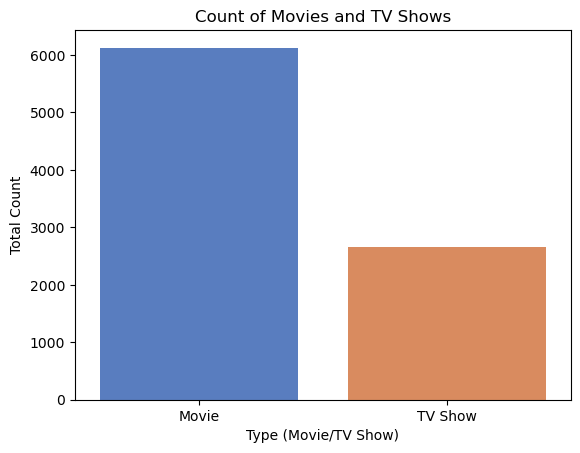

In [17]:
sns.countplot(x=netflix_titles.type, palette="muted");
plt.title("Count of Movies and TV Shows")
plt.xlabel("Type (Movie/TV Show)")
plt.ylabel("Total Count")
plt.show()

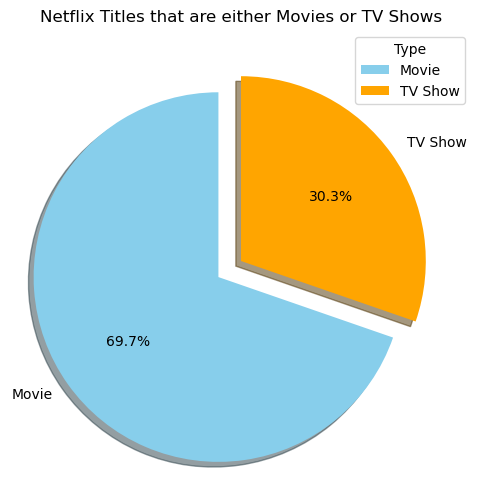

In [18]:
plt.figure(figsize = (12,6))
plt.title("Netflix Titles that are either Movies or TV Shows")
plt.pie(
    netflix_titles.type.value_counts(),  # Data for the pie chart (counts of unique values)
    explode=(0.15, 0),  # Specifies the fraction of the radius to offset each wedge (explode the first wedge)
    startangle=90,  # The angle by which the start of the pie is rotated
    shadow=True,  # Adds a shadow effect to the pie chart
    autopct='%1.1f%%',  # Format for displaying the percentage on each wedge
    labels=netflix_titles.type.value_counts().index,  # Labels for each wedge (based on unique values)
    colors=['skyblue', 'orange']  # Colors for each wedge
)
plt.legend(title = 'Type')
plt.show()

In [19]:
print(netflix_movies.shape[0],netflix_shows.shape[0])

6126 2664


So there are roughly **6,000+ movies** and **almost 2,600 shows** with movies being the majority. As shows are always an ongoing thing and have episodes, this thing makes sense. However, in terms of title, there are far more movie titles (69.7%) than TV show titles (30.3%).

## Netflix Film Ratings
Now, we will explore the ratings which are based on the film rating system. The ratings will be based on the age of the respective audience from youngest to oldest. We will exclude the ratings 'NR' and 'UR' in the visuals since they stand for unrated and non-rated content.

In [20]:
netflix_titles.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,No Cast,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,No Director,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",Country Unavailable,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,No Director,No Cast,Country Unavailable,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,No Director,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


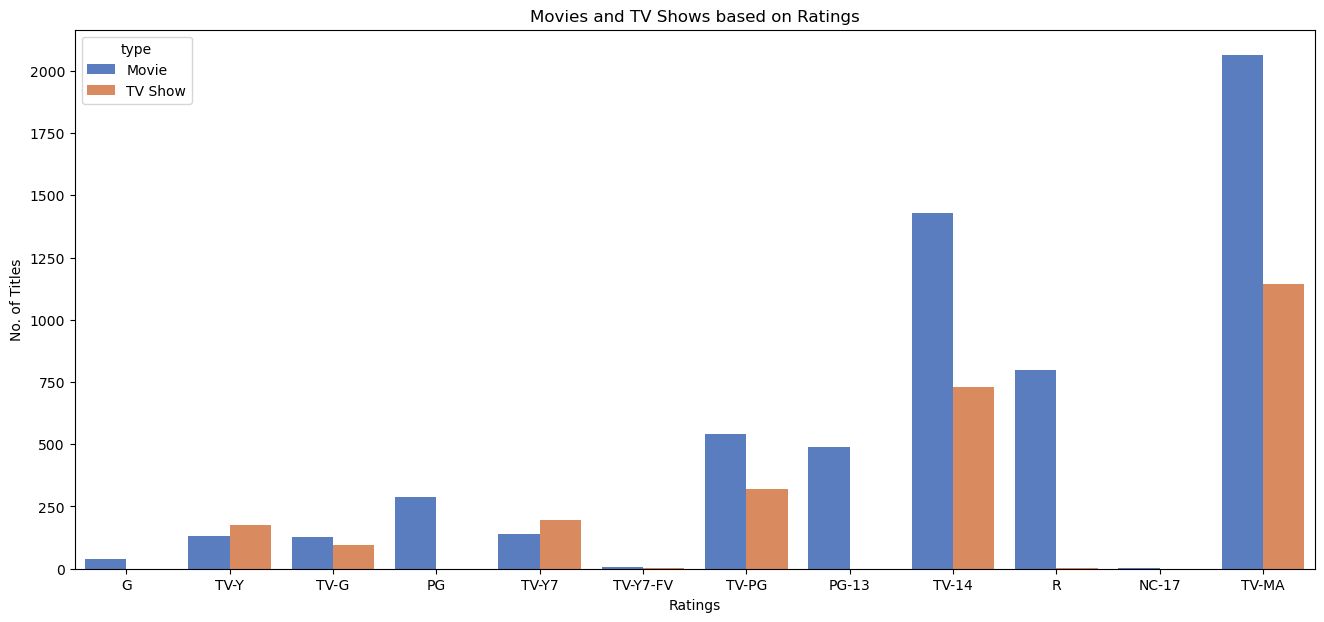

In [21]:
order =  ['G', 'TV-Y', 'TV-G', 'PG', 'TV-Y7', 'TV-Y7-FV', 'TV-PG', 'PG-13', 'TV-14', 'R', 'NC-17', 'TV-MA']
plt.figure(figsize=(16,7))  #Setting the size of the figure
sns.countplot(x = netflix_titles.rating,hue = netflix_titles.type,order = order,palette = 'muted')
plt.title('Movies and TV Shows based on Ratings')
plt.xlabel('Ratings')
plt.ylabel('No. of Titles')
plt.show()

C:\Users\sshre\AppData\Local\Temp\ipykernel_11544\413069417.py:15: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


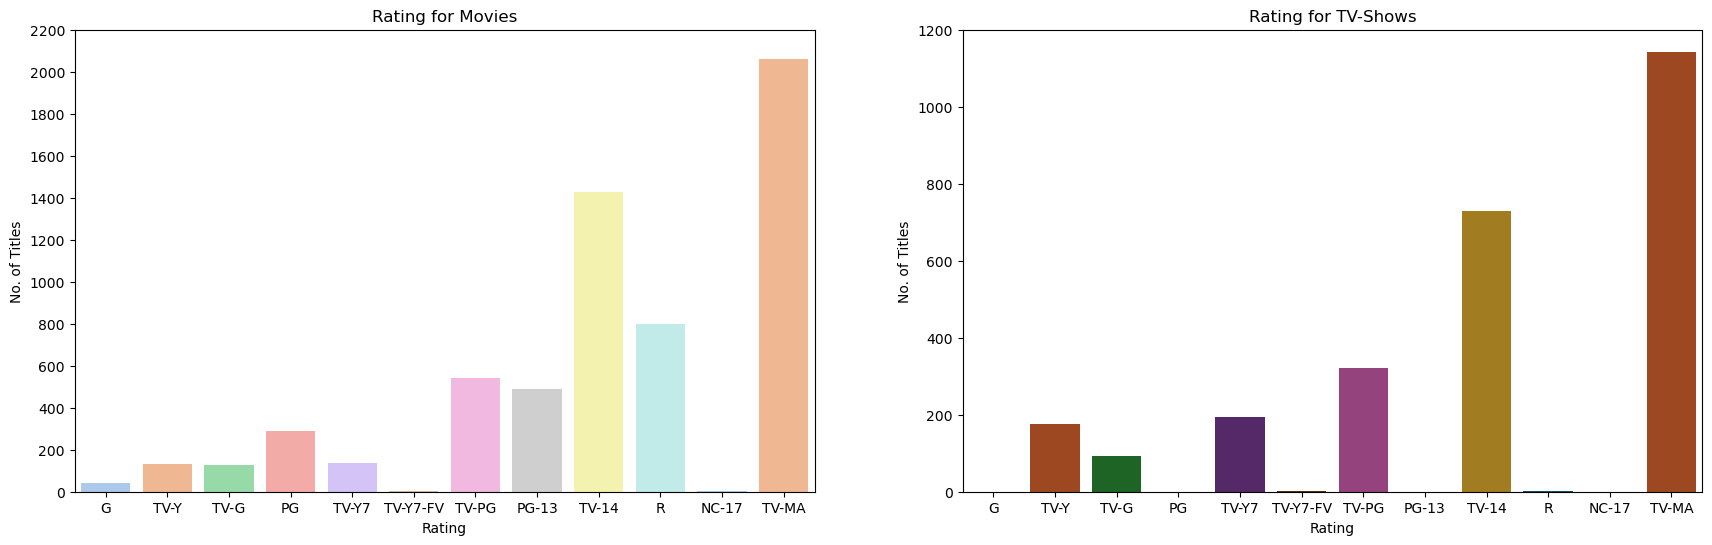

In [22]:
fig,axes = plt.subplots(1,2,figsize=(21,6))
#Creates fig and a set of subplots(axes) with one row and two columns. The figsize parameter are set.

m = sns.countplot(x = netflix_movies.rating,order=order,palette = 'pastel',ax=axes[0])
#ax=axes[0]: Specifies that this plot will be drawn on the first subplot
m.set_title('Rating for Movies')
m.set_xlabel('Rating')
m.set_ylabel('No. of Titles')
m.set(yticks=np.arange(0,2400,200))  #Sets the y-axis tick positions at regular intervals.

tv = sns.countplot(x = netflix_shows.rating,order=order,palette = 'dark',ax=axes[1])
tv.set_title('Rating for TV-Shows')
tv.set_xlabel('Rating')
tv.set_ylabel('No. of Titles')
fig.show()

There are nearly **2100 Movies for mature audience**, and these are more as compared to TV-Shows.
Overall, there is much more content for a more mature audience. However, for the younger audience (under the age of 16 or 17), it is the opposite, there are slightly more TV shows than there are movies. There are very less R-Rated TV-Shows.

## Date Added

In [23]:
netflix_titles['year_added'] = pd.DatetimeIndex(netflix_titles['date_added']).year
netflix_movies['year_added'] = pd.DatetimeIndex(netflix_movies['date_added']).year
netflix_shows['year_added'] = pd.DatetimeIndex(netflix_shows['date_added']).year

netflix_titles['month_added'] = pd.DatetimeIndex(netflix_titles['date_added']).month
netflix_movies['month_added'] = pd.DatetimeIndex(netflix_movies['date_added']).month
netflix_shows['month_added'] = pd.DatetimeIndex(netflix_shows['date_added']).month

netflix_titles['day_added'] = pd.DatetimeIndex(netflix_titles['date_added']).weekday
netflix_movies['day_added'] = pd.DatetimeIndex(netflix_movies['date_added']).weekday
netflix_shows['day_added'] = pd.DatetimeIndex(netflix_shows['date_added']).weekday

Here we are splitting the 'date_added' column into 3 different columns which have datetime type rather than the str type of the former.

In [24]:
netflix_titles.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,year_added,month_added,day_added
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,No Cast,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",2021,9,5
1,s2,TV Show,Blood & Water,No Director,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",2021,9,4
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",Country Unavailable,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,2021,9,4
3,s4,TV Show,Jailbirds New Orleans,No Director,No Cast,Country Unavailable,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo...",2021,9,4
4,s5,TV Show,Kota Factory,No Director,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,2021,9,4


In [25]:
netflix_year = netflix_titles['year_added'].value_counts().to_frame().reset_index().rename(columns={'index':'year','year_added':'count'})
#Creates a new dataframe with no of additions in each year
# to_frame() converts the resulting Pandas Series to a DataFrame
#reset_index() resets the index of the DataFrame. The 'year_added' values become a new column, and a default integer index is assigned to the DataFrame.
#rename(....) renames the columns of the DataFrame.

netflix_year = netflix_year.sort_values('year')
#Sorts yearwise

netflix_year

,year,count
12,2008,2
11,2009,2
13,2010,1
8,2011,13
10,2012,3
9,2013,11
7,2014,24
6,2015,82
5,2016,426
4,2017,1185


In [26]:
#Similar Process done for Movies & Shows
netflix_year2 = netflix_titles[['type','year_added']]
movie_year = netflix_year2[netflix_year2['type']=='Movie'].year_added.value_counts().to_frame().reset_index().rename(columns={'index': 'year','year_added':'count'}).sort_values('year')
show_year = netflix_year2[netflix_year2['type']=='TV Show'].year_added.value_counts().to_frame().reset_index().rename(columns={'index': 'year','year_added':'count'}).sort_values('year')

In [27]:
movie_year

,year,count
12,2008,1
11,2009,2
13,2010,1
8,2011,13
10,2012,3
9,2013,6
7,2014,19
6,2015,56
5,2016,251
4,2017,836


**Plotting the Data**

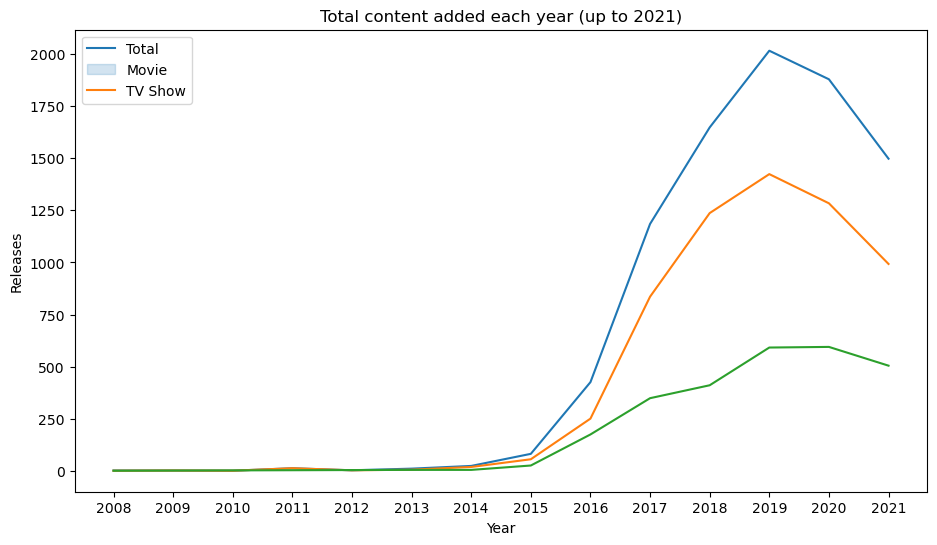

In [28]:
fig, ax = plt.subplots(figsize=(11, 6))
sns.lineplot(data=netflix_year, x='year', y='count')
sns.lineplot(data=movie_year, x='year', y='count')
sns.lineplot(data=show_year, x='year', y='count')

ax.set_xticks(np.arange(2008, 2022, 1))
plt.title("Total content added each year (up to 2021)")
plt.legend(['Total','Movie','TV Show'])
plt.ylabel("Releases")
plt.xlabel("Year")
plt.show()

Based on the above timeline, we can see that the popular streaming platform **started gaining traction from 2015**. Since then, the amount of content added has been tremendous. We can see that there has been a consistent growth in the number of movies on Netflix compared to shows. Due to the lockdown across the world, releases decreased in the year 2020.

## Netflix Film Duration

C:\Users\sshre\AppData\Local\Temp\ipykernel_11544\898473274.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  plot = sns.distplot(x = netflix_movies.duration,color='skyblue',ax=axes[0])


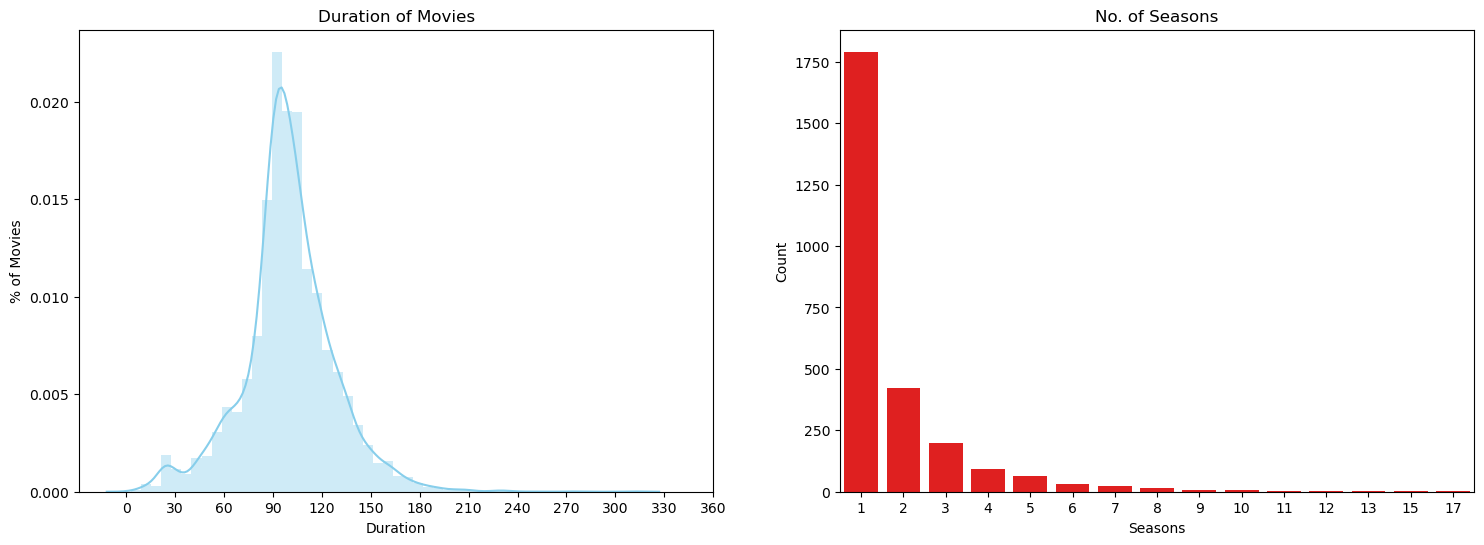

In [29]:
fig,axes = plt.subplots(1,2,figsize=(18,6))
plot = sns.distplot(x = netflix_movies.duration,color='skyblue',ax=axes[0])
#Distribution plot which includes a histogram KDE plot.
plot.set_xticks(np.arange(0,380,30))
plot.set_title('Duration of Movies')
plot.set_xlabel('Duration')
plot.set_ylabel('% of Movies')
plot2 = sns.countplot(x = netflix_shows.seasons,color = 'red',ax = axes[1])
plot2.set_xlabel('Seasons')
plot2.set_ylabel('Count')
plot2.set_title('No. of Seasons')
plt.show()

Now we will look into the duration of Netflix films. Since movies are measured in time and shows are measured by seasons, we need to split the dataset between movies and TV shows. On the left, we can see that the duration for Netflix movies closely resembles a normal distribution with the average viewing time spanning about 90 minutes which seems to make sense. Netflix TV shows on the other hand seems to be heavily skewed to the right where the majority of shows only have 1 season.

## Popular Genres

In [30]:
filtered_genres = netflix_titles.set_index('title').listed_in.str.split(', ', expand=True).stack().reset_index(level=1, drop=True)
# This manipulates the 'listed_in' column to extract individual genres and create a new DataFrame called filtered_genres.
#set_index('title'): This temporarily modifies & the 'title' column as the index of the netflix_titles DataFrame. 
#listed_in.str.split(', ', expand=True):It splits the comma-separated values in the 'listed_in' column into separate columns.
#stack(): This convertings data from wide to long format & combines all genres single column(creates a Pandas Series)
#reset_index(level=1, drop=True)resets the index of the Pandas Series, dropping the level1 & returns a Series with the 'title' column and a new column containing the individual genres.
filtered_genres

title
Dick Johnson Is Dead               Documentaries
Blood & Water             International TV Shows
Blood & Water                          TV Dramas
Blood & Water                       TV Mysteries
Ganglands                         Crime TV Shows
                                  ...           
Zoom                    Children & Family Movies
Zoom                                    Comedies
Zubaan                                    Dramas
Zubaan                      International Movies
Zubaan                          Music & Musicals
Length: 19294, dtype: object

In [31]:
filtered_genres.value_counts().index
#Returns list of genres

Index(['International Movies', 'Dramas', 'Comedies', 'International TV Shows',
       'Documentaries', 'Action & Adventure', 'TV Dramas',
       'Independent Movies', 'Children & Family Movies', 'Romantic Movies',
       'Thrillers', 'TV Comedies', 'Crime TV Shows', 'Kids' TV', 'Docuseries',
       'Music & Musicals', 'Romantic TV Shows', 'Horror Movies',
       'Stand-Up Comedy', 'Reality TV', 'British TV Shows', 'Sci-Fi & Fantasy',
       'Sports Movies', 'Anime Series', 'Spanish-Language TV Shows',
       'TV Action & Adventure', 'Korean TV Shows', 'Classic Movies',
       'LGBTQ Movies', 'TV Mysteries', 'Science & Nature TV',
       'TV Sci-Fi & Fantasy', 'TV Horror', 'Anime Features', 'Cult Movies',
       'Teen TV Shows', 'Faith & Spirituality', 'TV Thrillers',
       'Stand-Up Comedy & Talk Shows', 'Movies', 'Classic & Cult TV',
       'TV Shows'],
      dtype='object')

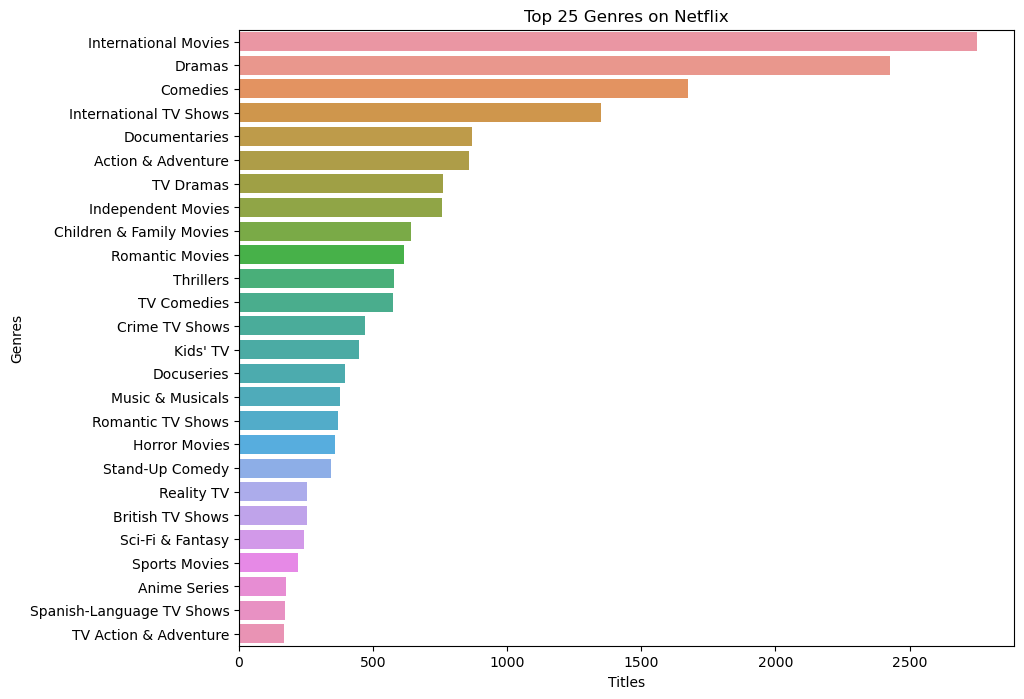

In [32]:
plt.figure(figsize=(10,8))
g = sns.countplot(y = filtered_genres, order=filtered_genres.value_counts().index[:26])
#Considers only the top 25 Genres
plt.title('Top 25 Genres on Netflix')
plt.xlabel('Titles')
plt.ylabel('Genres')
plt.show()

In terms of genres, **International movies tops the genre chart** surprisingly followed by dramas and comedies. Even though the United States has the most content available, it looks like Netflix has decided to release a ton of international movies and TV Shows. The reason for this could be that most Netflix subscribers aren't actually in the United States, but rather the majority of viewers are actually international subscribers.

## Country of Origin

In [33]:
filtered_countries = netflix_titles.set_index('title').country.str.split(', ', expand=True).stack().reset_index(level=1, drop=True);
#Similar to genres

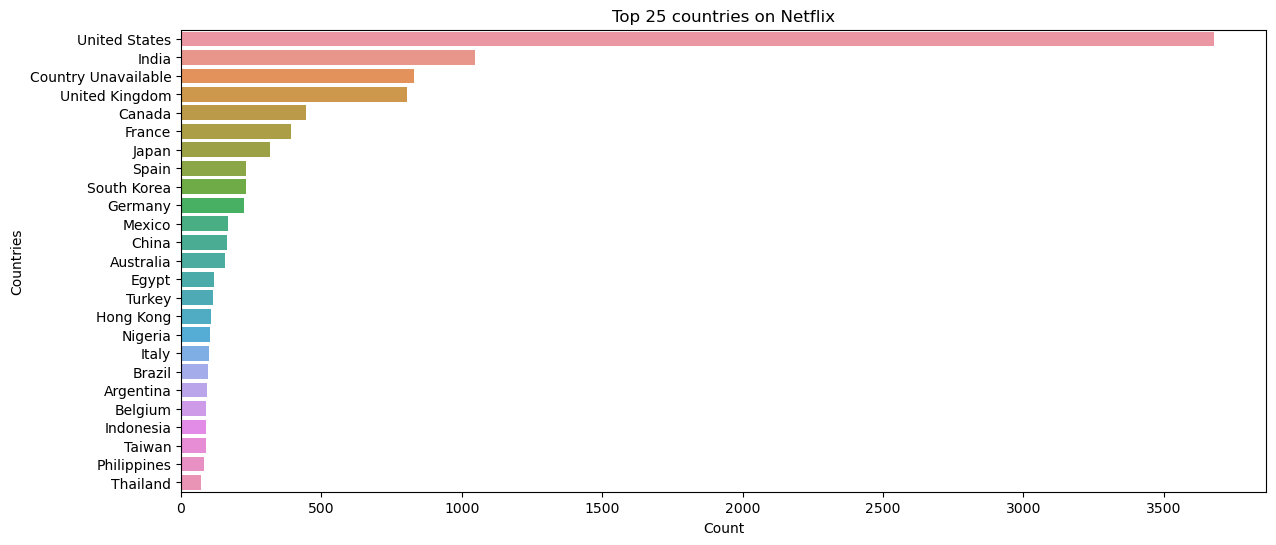

In [34]:
plt.figure(figsize=(14,6))
plot3 = sns.countplot(y = filtered_countries,order = filtered_countries.value_counts().index[:25])
plot3.set_title('Top 25 countries on Netflix')
plot3.set_xlabel('Count')
plot3.set_ylabel('Countries')
plt.show()

Now we will explore the country of production with the most content on Netflix. A film or show could have been produced in multiple countries, therefore we need to seperate all countries within a film before we can analyze the data. After seperating countries and removing titles with no countries available, we can plot a Top 25 list to see which countries have produced the most films available on Netflix. The United States stands out on top since Netflix is an American company. India surprisingly comes in second followed by the UK and Canada. China interestingly is not even close to the top even though it has about 18% of the world's population. Reasons for this could be less penetration of Netflix in China, thus less chinese films & shows.

## Answering Questions

**1. How many titles released in the year 2021 ?**

In [35]:
netflix_titles[netflix_titles.year_added == 2021]['title'].count()

1498

**2. How many titles released from India ?**

In [36]:
netflix_titles[netflix_titles.country == 'India']['title'].count()

972

**3. Who are the top 10 actors on Netflix based on number of titles?**

In [37]:
filtered_cast = netflix_titles[netflix_titles.cast != 'No Cast'].set_index('title').cast.str.split(', ', expand=True).stack().reset_index(level=1, drop=True)
#Splitting Cast Details into individual cast, this will then be used in countplot

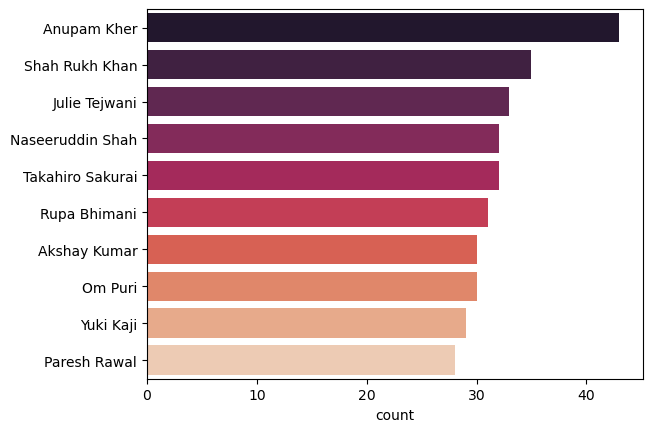

In [38]:
sns.countplot(y = filtered_cast, order=filtered_cast.value_counts().index[:10], palette='rocket')
plt.show()

**4. In which year, Netflix added more International Movies ?**

In [39]:
international_movies = netflix_titles[netflix_titles['listed_in'].str.contains('International Movies')]
#List of movies which contain Intenational in 'listed_in'
international_movies.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,year_added,month_added,day_added
7,s8,Movie,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...","United States, Ghana, Burkina Faso, United Kin...","September 24, 2021",1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies","On a photo shoot in Ghana, an American model s...",2021,9,4
12,s13,Movie,Je Suis Karl,Christian Schwochow,"Luna Wedler, Jannis Niewöhner, Milan Peschel, ...","Germany, Czech Republic","September 23, 2021",2021,TV-MA,127 min,"Dramas, International Movies",After most of her family is murdered in a terr...,2021,9,3
16,s17,Movie,Europe's Most Dangerous Man: Otto Skorzeny in ...,"Pedro de Echave García, Pablo Azorín Williams",No Cast,Country Unavailable,"September 22, 2021",2020,TV-MA,67 min,"Documentaries, International Movies",Declassified documents reveal the post-WWII li...,2021,9,2
22,s23,Movie,Avvai Shanmughi,K.S. Ravikumar,"Kamal Hassan, Meena, Gemini Ganesan, Heera Raj...",Country Unavailable,"September 21, 2021",1996,TV-PG,161 min,"Comedies, International Movies",Newly divorced and denied visitation rights wi...,2021,9,1
24,s25,Movie,Jeans,S. Shankar,"Prashanth, Aishwarya Rai Bachchan, Sri Lakshmi...",India,"September 21, 2021",1998,TV-14,166 min,"Comedies, International Movies, Romantic Movies",When the father of the man she loves insists t...,2021,9,1


In [40]:
intmov_month_year_df = international_movies.groupby('year_added')['month_added'].value_counts().unstack().fillna(0).T
#Groups Data by Year_added and counts the occurences in each month
intmov_month_year_df

year_added,2009,2011,2014,2015,2016,2017,2018,2019,2020,2021
month_added,,,,,,,,,,
1,0.0,0.0,1.0,0.0,3.0,30.0,48.0,52.0,28.0,25.0
2,0.0,0.0,0.0,1.0,1.0,35.0,29.0,49.0,30.0,31.0
3,0.0,0.0,0.0,0.0,3.0,42.0,83.0,54.0,34.0,38.0
4,0.0,0.0,0.0,0.0,3.0,32.0,34.0,55.0,73.0,68.0
5,1.0,1.0,0.0,0.0,4.0,28.0,33.0,39.0,60.0,39.0
6,0.0,0.0,0.0,1.0,6.0,29.0,25.0,59.0,69.0,52.0
7,0.0,0.0,0.0,1.0,9.0,20.0,64.0,26.0,59.0,66.0
8,0.0,0.0,0.0,0.0,5.0,30.0,92.0,35.0,24.0,52.0
9,0.0,0.0,0.0,1.0,6.0,35.0,49.0,41.0,65.0,37.0


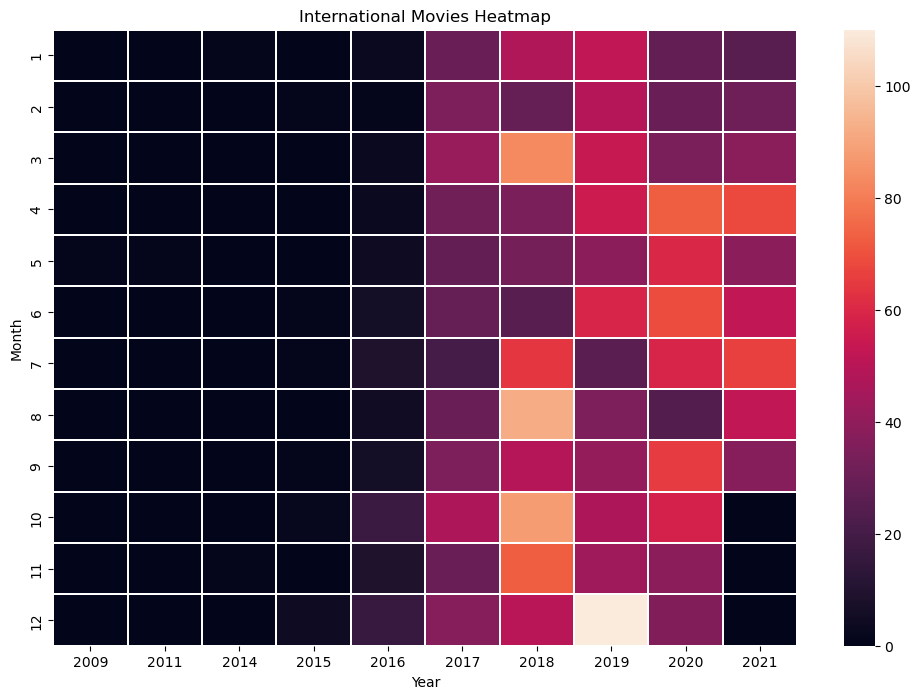

In [41]:
fig, ax = plt.subplots(figsize=(12, 8))
sns.heatmap(intmov_month_year_df, linewidths=0.025)
plt.title("International Movies Heatmap")
plt.ylabel("Month")
plt.xlabel("Year")
plt.show()

In [42]:
intmov_month_year_df_sum = pd.DataFrame(intmov_month_year_df.sum()).reset_index().sort_values('year_added')
intmov_month_year_df_sum.columns = ['Year' , 'Count']
#Total number per year

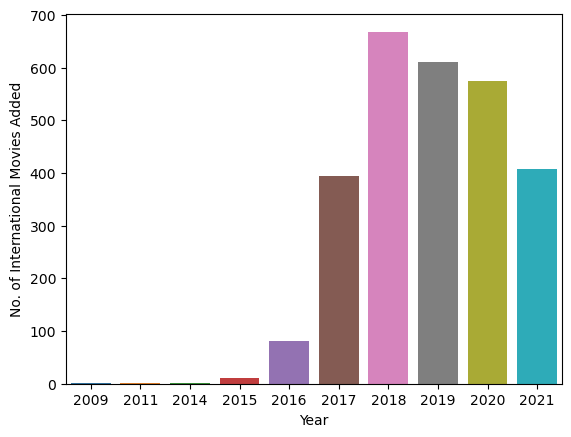

In [43]:
sns.barplot(data = intmov_month_year_df_sum, x = intmov_month_year_df_sum.Year, y= intmov_month_year_df_sum.Count )
plt.ylabel('No. of International Movies Added')
plt.show()

From the Bar Chart it can be seen that most international movies were added in 2018 and from the heatmap above, we can see that a majority of international movies were added in December 2019.

**5. In which year, highest International TV Shows were added in Netflix ?**

In [44]:
international_shows = netflix_titles[netflix_titles.listed_in.str.contains('International TV Shows?')]
int_tv_shows_year = international_shows.groupby('year_added')['month_added'].value_counts().unstack().fillna(0).T

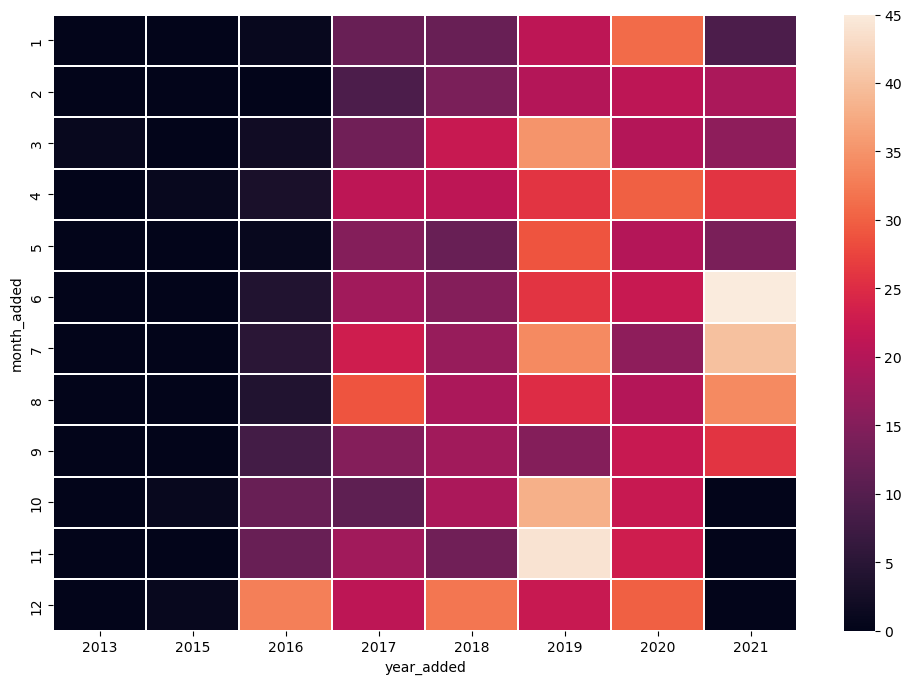

In [45]:
plt.figure(figsize=(12, 8))
sns.heatmap(int_tv_shows_year,linewidths = 0.03)
plt.show()

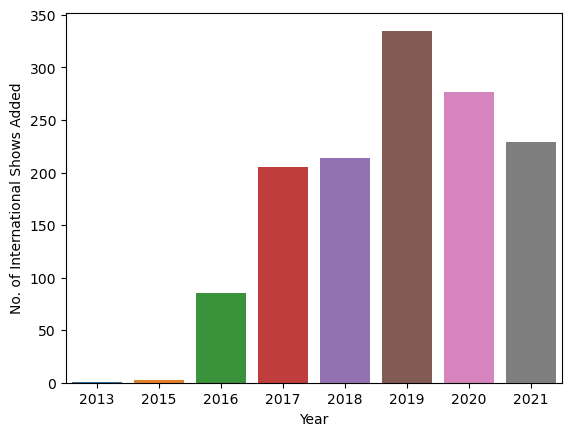

In [46]:
int_tv_shows_year_sum = pd.DataFrame(int_tv_shows_year.sum()).reset_index().sort_values('year_added')
int_tv_shows_year_sum.columns = ['Year' , 'Count']
#Total number per year
sns.barplot(data = int_tv_shows_year_sum, x = int_tv_shows_year_sum.Year, y= int_tv_shows_year_sum.Count )
plt.ylabel('No. of International Shows Added')
plt.show()

In the above BarChart, we can see that the majority of international TV shows were added throughout the year 2019, the maximum being November 2019.

# Inferences and Conclusion
It's clear that Netflix has grown over the years. We can see it from the data that the company took certain approaches in their marketing strategy to break into new markets around the world. Based on an article from Business Insider, Netflix had about 158 million subscribers worldwide with 60 million from the US and almost 98 million internationally. Netflix's original subscriber base was based solely in the United States following its IPO. A large part of its success was due to the decision to expand to international markets. The popular markets prioritizes what content the company will release. In this case, we can see that a good amount of international movies and TV shows were added over the years as part of Netflix's global expansion.

## References:
https://www.kaggle.com/shivamb/netflix-shows

**By Shrevesh**